In [1]:
#Libraries needed for importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# To supress the warning
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")


In [2]:
#Load the excel sheet
data = pd.read_csv("tatasteel.csv")

# Display the first 5 rows
data.head()


,Distributor ID,Company Name,Country,State,City,Order Volume,Payment Score,Delivery Performance,Complaint Count,Engagement Score,Product Category,Contact Person,Contact Email,Phone Number
0,D1001,SteelMart Distributors,India,Jharkhand,Jamshedpur,120,85,95,1,60,Steel Sheets,Rajiv Sharma,rajiv.sharma@steelmart.com,'+91-9876543210
1,D1002,Metro Steel Supply,India,Maharashtra,Mumbai,95,78,88,0,55,Steel Rods,Anita Desai,anita.desai@metrosteel.com,'+91-9876543211
2,D1003,Global Metals,India,West Bengal,Kolkata,110,92,90,2,70,Steel Coils,Sandeep Ghosh,sandeep.ghosh@globalmetals.com,'+91-9876543212
3,D1004,Alloy Traders,India,Tamil Nadu,Chennai,130,80,93,1,65,Alloy Steel,Prakash Kumar,prakash.kumar@alloytraders.com,'+91-9876543213
4,D1005,Prime Steel Agency,India,Gujarat,Ahmedabad,105,88,91,0,62,Steel Plates,Meena Patel,meena.patel@primesteel.com,'+91-9876543214


In [4]:
# Brief Data Summary
print("Shape:", data.shape)
print("\nInfo:")
data.info()

# Summary of the Dataset: This dataset contains information such as the number of orders, 
#engagement ratings, and the delivery efficiency of various distributors. 
#We implement clustering techniques to pinpoint unique groups of distributors, enhancing our targeting and strategic planning.

Shape: (40, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Distributor ID        40 non-null     object
 1   Company Name          40 non-null     object
 2   Country               40 non-null     object
 3   State                 40 non-null     object
 4   City                  40 non-null     object
 5   Order Volume          40 non-null     int64 
 6   Payment Score         40 non-null     int64 
 7   Delivery Performance  40 non-null     int64 
 8   Complaint Count       40 non-null     int64 
 9   Engagement Score      40 non-null     int64 
 10  Product Category      40 non-null     object
 11  Contact Person        40 non-null     object
 12  Contact Email         40 non-null     object
 13  Phone Number          40 non-null     object
dtypes: int64(5), object(9)
memory usage: 4.5+ KB


In [6]:
# Selecting relevant numerical columns for clustering
Attributes = data[["Order Volume", "Engagement Score"]].values

# What’s the Reason for These Attributes? 
#Order Volume reveals the amount of business a distributor generates, while 
#Engagement Score shows the strength of the relationship and commitment. Both are important for categorizing different groups.

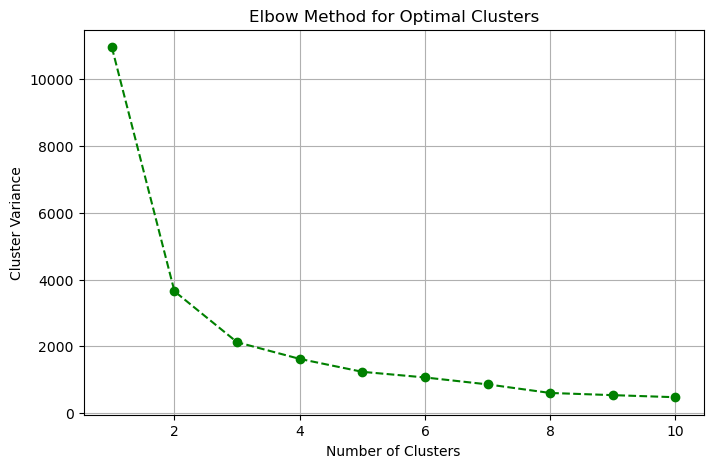

In [9]:
from sklearn.cluster import KMeans

cluster_sum = []

# Trying values of k from 1 to 10
for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++', random_state=0)
    model.fit(Attributes)
    cluster_sum.append(model.inertia_)

# Plotting WCSS values to visualize elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cluster_sum, marker='o', linestyle='--', color='green')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Variance")
plt.grid(True)
plt.show()

# Understanding the Elbow Plot
#The chart illustrates the point at which the line takes a sharp turn, resembling an elbow.
#This specific point indicates the ideal number of clusters in which to categorize the distributors. 
#In this case, it appears that dividing them into 5 clusters (k = 5) is the most suitable option.

In [11]:
# Apply KMeans with 5 clusters
model = KMeans(n_clusters=5, init='k-means++', random_state=0)
predicted_clusters = model.fit_predict(Attributes)


In [12]:
# Add the cluster as a new column in the dataframe
data['Segment'] = predicted_clusters
data.head()


,Distributor ID,Company Name,Country,State,City,Order Volume,Payment Score,Delivery Performance,Complaint Count,Engagement Score,Product Category,Contact Person,Contact Email,Phone Number,Segment
0,D1001,SteelMart Distributors,India,Jharkhand,Jamshedpur,120,85,95,1,60,Steel Sheets,Rajiv Sharma,rajiv.sharma@steelmart.com,'+91-9876543210,1
1,D1002,Metro Steel Supply,India,Maharashtra,Mumbai,95,78,88,0,55,Steel Rods,Anita Desai,anita.desai@metrosteel.com,'+91-9876543211,0
2,D1003,Global Metals,India,West Bengal,Kolkata,110,92,90,2,70,Steel Coils,Sandeep Ghosh,sandeep.ghosh@globalmetals.com,'+91-9876543212,4
3,D1004,Alloy Traders,India,Tamil Nadu,Chennai,130,80,93,1,65,Alloy Steel,Prakash Kumar,prakash.kumar@alloytraders.com,'+91-9876543213,3
4,D1005,Prime Steel Agency,India,Gujarat,Ahmedabad,105,88,91,0,62,Steel Plates,Meena Patel,meena.patel@primesteel.com,'+91-9876543214,4


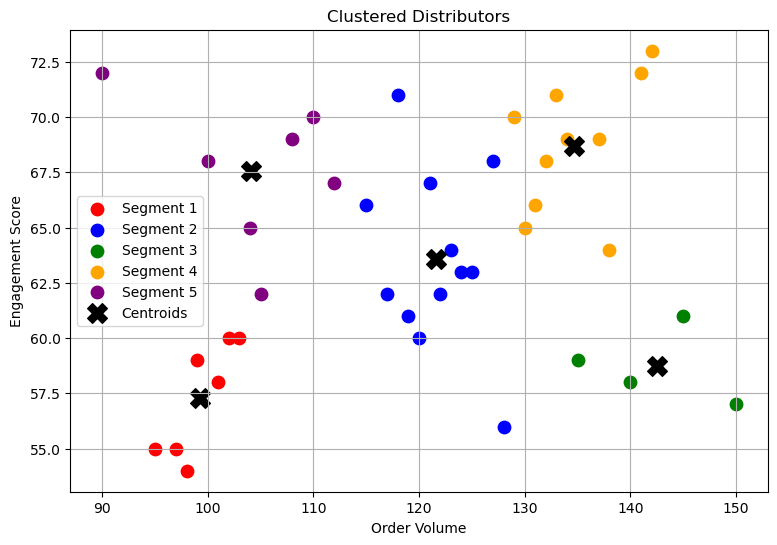

In [13]:
# Plotting the clusters
plt.figure(figsize=(9, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5']

for i in range(5):
    plt.scatter(Attributes[predicted_clusters == i, 0],
                Attributes[predicted_clusters == i, 1],
                s=80, c=colors[i], label=labels[i])

# Plot centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("Clustered Distributors")
plt.xlabel("Order Volume")
plt.ylabel("Engagement Score")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Save the segmented data
data.to_csv("TataSteel_Distributor_Segmentation_Harshita.csv", index=False)
print("Segmented distributor data saved successfully!")


Segmented distributor data saved successfully!
